Q - 01: Use yfinance to Extract Stock Data

In [4]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Q - 02: Use Webscraping to Extract Tesla Revenue Data

In [12]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text 


# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html5lib')

# Find the table with Tesla revenue
tesla_table = soup.find_all("table")[1]

# Read the HTML table into a DataFrame
tesla_revenue = pd.read_html(str(tesla_table))[0]

# Rename columns
tesla_revenue.columns = ["Date", "Revenue"]

# Display the DataFrame
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30     $31
49  2010-06-30     $28
50  2010-03-31     $21
52  2009-09-30     $46
53  2009-06-30     $27


C:\Users\mahen\AppData\Local\Temp\ipykernel_15296\3424963167.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tesla_table))[0]


Q - 03: Use yfinance to Extract Stock Data

In [13]:
import yfinance as yf

# Create a ticker object for GameStop
gamestop = yf.Ticker("GME")
# Extract stock information with the period parameter set to "max"
gme_data = gamestop.history(period="max")
# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Q - 04: Use Webscraping to Extract GME Revenue Data

In [14]:
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response as a variable named html_data
html_data = response.text 

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop revenue
gme_table = soup.find_all("table")[1]

# Read the HTML table into a DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Display the last five rows of the DataFrame
print(gme_revenue.tail())


          Date Revenue
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


C:\Users\mahen\AppData\Local\Temp\ipykernel_15296\2592497183.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_table))[0]


Q - 05: Plot Tesla Stock Graph

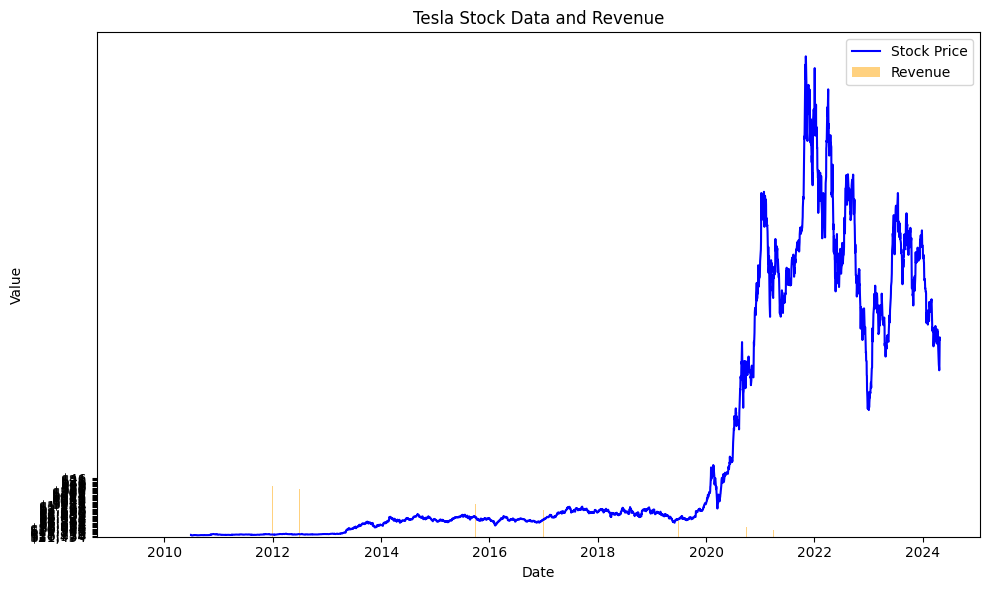

In [31]:
def make_graph(stock_data, revenue_data, title):
    import matplotlib.pyplot as plt
    
    # Plotting stock data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    
    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange', alpha=0.5)
    
    # Adding title and labels
    plt.title(f'{title} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=0)
    plt.legend()
    
    # Displaying the graph
    plt.tight_layout()
    plt.show()

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

Q -06 : Question 6: Plot GameStop Stock Graph¶

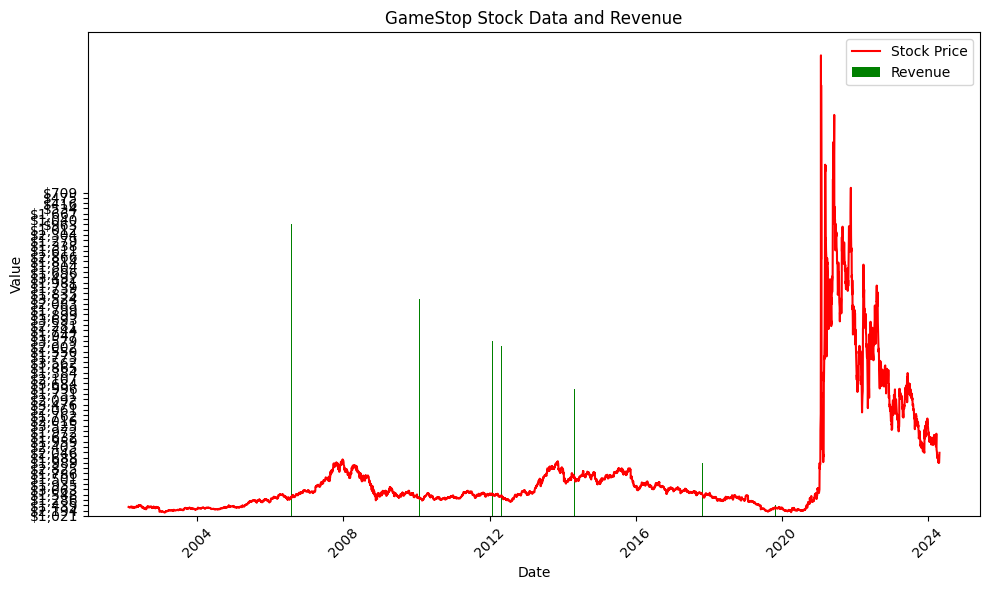

In [33]:
def make_graph(stock_data, revenue_data, title):
    import matplotlib.pyplot as plt
    
    # Plotting stock data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='red')
    
    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green', alpha=1.0)
    
    # Adding title and labels
    plt.title(f'{title} Stock Data and Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    
    # Displaying the graph
    plt.tight_layout()
    plt.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
